# 13. Fixing calibration parameters
In this notebook we will demonstrate how to fix the calibration parameters $\gamma$ and $\alpha$. This can be useful in setups where you have insufficient reference sections to calibrate these, but you do have information on these parameters from previous setups with the same fiber.

We will be using the same dataset as notebook 5. Calibration of single-ended measurement with OLS

In [1]:
import os

from dtscalibration import read_silixa_files
import matplotlib.pyplot as plt

%matplotlib inline

filepath = os.path.join('..', '..', 'tests', 'data', 'single_ended')

ds = read_silixa_files(
    directory=filepath,
    timezone_netcdf='UTC',
    file_ext='*.xml')

ds100 = ds.sel(x=slice(-30, 101))  # only calibrate parts of the fiber, in meters
sections = {
            'probe1Temperature':    [slice(20, 25.5)],  # we only use the warm bath in this notebook
            }
ds100.sections = sections

3 files were found, each representing a single timestep
4 recorded vars were found: LAF, ST, AST, TMP
Recorded at 1461 points along the cable
The measurement is single ended
Reading the data from disk


/home/bart/git/travis_fix/python-dts-calibration/src/dtscalibration/io.py:1843: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  'time', pd.DatetimeIndex(v).tz_convert(timezone_netcdf).astype(


From the previous calibration we know that the $\gamma$ parameter value was 481.9 and the $\alpha$ value was -2.014e-05.
We define these, along with their variance. In this case we do not know what the variance was, as we ran an OLS calibration, so we will set the variance to 0.

It is important to note that when setting parameters, the covariances between the parameters are not taken into account in the uncertainty.

In [2]:
fix_gamma = (481.9, 0)  # (gamma value, gamma variance)
fix_dalpha = (-2.014e-5, 0)  # (alpha value, alpha variance)

ds100.calibration_single_ended(fix_gamma=fix_gamma,
                               fix_dalpha=fix_dalpha,
                               method='ols')

Let's see if fixing the parameters worked:

In [3]:
print('gamma used in calibration:', ds100.gamma.values)
print('dalpha used in calibration:', ds100.dalpha.values)

gamma used in calibration: 481.9
dalpha used in calibration: -2.014e-05


Let's plot the calibrated temperature. You'll see that this gives the same result as in notebook 05.

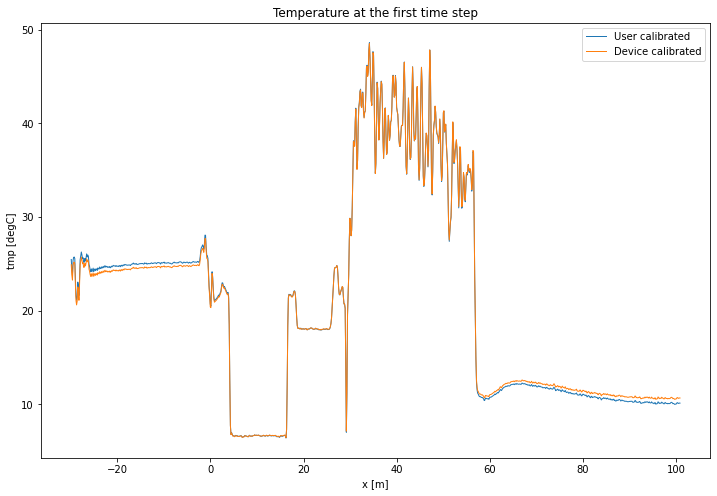

In [4]:
ds1 = ds100.isel(time=0)  # take only the first timestep

ds1.tmpf.plot(linewidth=1, figsize=(12, 8), label='User calibrated')  # plot the temperature calibrated by us
ds1.tmp.plot(linewidth=1, label='Device calibrated')  # plot the temperature calibrated by the device
plt.title('Temperature at the first time step')
plt.legend();